**Topic Modeling:**
Topic modeling is a way of abstract modeling to discover the abstract ‘topics’ that occur in the collections of documents.
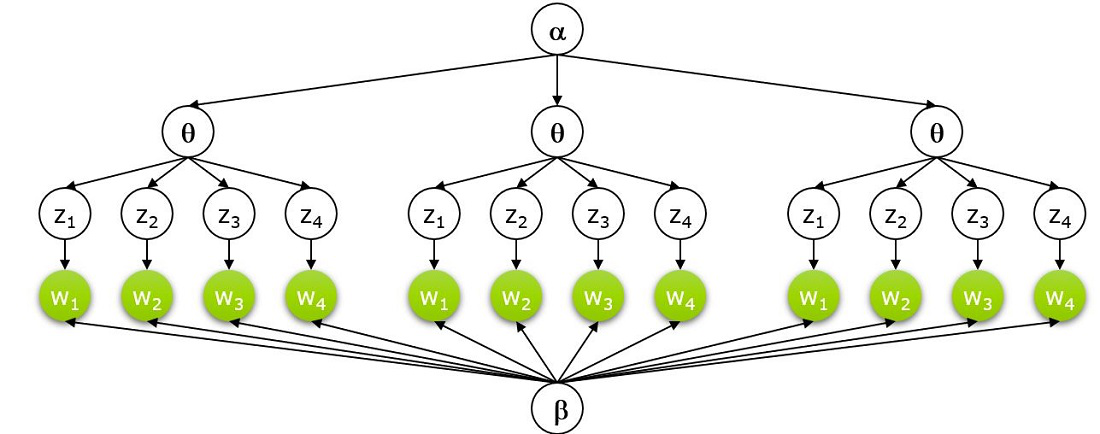

Let’s suppose we have D documents using the vocabulary of V-word types. Each document consists of an N-words token (can be removed or padded ). Now, we assume K topics, this required a K-dimensional vector that represents the topic distribution for the document.
Each topic has a V-dimensional multinomial beta_k over words with a common symmetric prior.
For each topic 1…k:
Draw a multinomial over words \varphi \sim Dir(\beta)      .
For each document 1…d:
Draw a multinomial over topics \theta \sim Dir(\alpha)
For each word w_{N_d}      :
Draw a topic Z_{N_d} \sim Mult(\theta_D)       with Z_{N_d} \epsilon [1..K]
Draw a word W_{N_d} \sim Mult(\varphi).

In [3]:
# install pyldavis
!pip install pyldavis
# imports
!pip install gensim pyLDAvis
! python3 -m spacy download en_core_web_sm

import pandas as pd
import numpy as np

import string
import spacy
import nltk

import gensim
from gensim import corpora

import matplotlib.pyplot as plt

import pyLDAvis
import pyLDAvis.gensim_models

nltk.download('wordnet')
from nltk.corpus import wordnet as wn
nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy.cli
spacy.cli.download("en_core_web_md")
import en_core_web_md
# fetch yelp review dataset and clean it
yelp_review = pd.read_csv('') #enter your data set here
yelp_review.head()
# print number of document and topics
print(len(yelp_review))
print("Unique Business")
print(len(yelp_review.groupby('business_id')))
print("Unique User")
print(len(yelp_review.groupby('user_id')))

# clean the document and remove punctuation
def clean_text(text):
  delete_dict = {sp_char: '' for sp_char in string.punctuation}
  delete_dict[' '] =' '
  table = str.maketrans(delete_dict)
  text1 = text.translate(table)
  textArr= text1.split()
  text2 = ' '.join([w for w in textArr if ( not w.isdigit() and
                      ( not w.isdigit() and len(w)>3))])
  return text2.lower()



yelp_review['text'] = yelp_review['text'].apply(clean_text)
yelp_review['Num_words_text'] = yelp_review['text'].apply(lambda x:len(str(x).split()))

print('-------Reviews By Stars --------')
print(yelp_review['stars'].value_counts())
print(len(yelp_review))
print('-------------------------')
max_review_data_sentence_length = yelp_review['Num_words_text'].max()

# print short review (
mask = (yelp_review['Num_words_text'] < 100) & (yelp_review['Num_words_text'] >=20)
df_short_reviews = yelp_review[mask]
df_sampled = df_short_reviews.groupby('stars').apply(lambda x: x.sample(n=100)).reset_index(drop = True)

print('No of Short reviews')
print(len(df_short_reviews))

# function to remove stopwords
def remove_stopwords(text):
	textArr = text.split(' ')
	rem_text = " ".join([i for i in textArr if i not in stop_words])
	return rem_text

# remove stopwords from the text
stop_words = stopwords.words('english')
df_sampled['text']=df_sampled['text'].apply(remove_stopwords)

# perform Lemmatization
lp = en_core_web_md.load(disable=['parser', 'ner'])
def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']):
	output = []
	for sent in texts:
			doc = nlp(sent)
			output.append([token.lemma_
							for token in doc if token.pos_ in allowed_postags ])
	return output
text_list=df_sampled['text'].tolist()
print(text_list[2])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[2])

# convert to document term frequency:
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary,
				num_topics=10, random_state=100,
				chunksize=1000, passes=50,iterations=100)
# print lda topics with respect to each word of document
lda_model.print_topics()

# calculate perplexity and coherence
print('\Perplexity: ', lda_model.log_perplexity(doc_term_matrix,
												total_docs=10000))

# calculate coherence
coherence_model_lda = CoherenceModel(model=lda_model,
									texts=tokenized_reviews, dictionary=dictionary ,
									coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence: ', coherence_lda)

# Now, we use pyLDA vis to visualize it
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=71a2ae0e79859635062f25c5444afbc1cee3ca10c7799fb5f59d5547cdcbce4c
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=2662ebaae915202922050ee691282d851c683b6db4c5c9b24f973dbc9da2fdb2
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyldavis sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-10-03 12:

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


FileNotFoundError: ignored